<a id = "title"></a>
# A Quick Introduction to Scientific Python


[Joseph C. Slater](joseph.slater@wright.edu)

Dedicated to [John D. Hunter](https://en.wikipedia.org/wiki/John_D._Hunter) and [Hans Petter Langtangen](https://en.wikipedia.org/wiki/Hans_Petter_Langtangen).

1. [A Quick Introduction to Scientific Python](#title)
2. [Overview](#overview)<br>
    2.1 [The Zen of Python](#zen)    
    2.2 [Integrated Development Environments](#ides)
3. [Namespaces](#namespaces)    
4. [Basic math and arrays](#math)
5. [File IO](#fileio)
6. [Variables/Methods/Help](#variables)
7. [Numerical Methods and Plotting](#nummethods)<br>
    7.1 [Other plotting](#other_plotting)
8. [Optimization](#optimization)
9. [Formatted output](#formatoutput)
10. [More advanced plotting](#aplotting)
11. [Manipulating Excel Spreadsheets](#excel)
12. [Mixing with other languages](#cross-language)
13. [Compiling Python](#compiling)
14. [Parallel Python](#parallel)<br>
     13.1 [Other Parallel processing](#other_parallel) 
15. [Your own package](#mycode)
16. [Other resources](#other)


<a id = "overview"></a>
# Overview
1. Python programs can be be written as object oriented or imperative. 
2. Python uses *duck typing* for variables. 
  - If it looks like a duck, and it acts like a duck, then it is a duck.
  
  - A float is a float and string is a string without the variable having to be predefined. 
  
  - One *can* specify if appropriate and necessary. 
3. It is a more formal language than Matlab. For instance: `f(2)`, is that the second element of a vector `f` or are you sending 2 to a function named `f`?
4. Codes can be, and for some are commonly, executed from a terminal, natively: In Unix/Linux/MacOS, starting a python code file with `#! /usr/bin/env python` or the appropriate path and changing the permissions allows the code to be executed as a terminal command itself. 
5. No end statements. This is weird to new users. Formatting, specifically indenting, defines the level within loops and conditional statements. This is frustrating if you are sloppy in formating but results in much more readable code. 
6. 0-indexing. We start counting at zero, just like for time, unlike matrices. This is common to the vast majority of modern computer languages- specifically not Matlab and not Fortran. 

<a id = "zen"></a>
## [The Zen of Python, PEP 20](https://www.python.org/dev/peps/pep-0020/)
* Beautiful is better than ugly.
* Explicit is better than implicit.
* Simple is better than complex.
* Complex is better than complicated.
* Flat is better than nested.
* Sparse is better than dense.
* Readability counts.
* Special cases aren't special enough to break the rules.
* Although practicality beats purity.
* Errors should never pass silently.
* Unless explicitly silenced.
* In the face of ambiguity, refuse the temptation to guess.
* There should be one– and preferably only one –obvious way to do it. (often not true)
* Although that way may not be obvious at first unless you're Dutch.
* Now is better than never.
* Although never is often better than *right* now.
* If the implementation is hard to explain, it's a bad idea.
* If the implementation is easy to explain, it may be a good idea.
* Namespaces are one honking great idea – let's do more of those!

<a id = "ides"></a>

## Python Editors and Integrated Development Environments

Python has a substantial number of standards for how to write and document code.

These seem very restrictive, but most are not enforced. They are recommendations (requirements for submitting to the code-base, though). 

These standards result in beautiful and readable code and actually make documenting your code fun. 

A good editor helps. All of this is available free, or in a free version:
1. Spyder: A Matlab-style IDE- best for scientific usage of Python writing longer codes. Open source. 
2. Jupyter: A Mathematica-like notebook better for using, or dabbling in Python, or for making usable notes and reports demonstrating usage.  Open source. 
4. Atom: GitHub's editor. With add-ins it is a powerful IDE itself. I tend to use it simultaneously with Jupyter when developing code (Atom is multi-language. I like having a single editor I'm good with).  Open source. 
3. Visual Studio Code: Modern open-source IDE well-suited for multiple languages (supported by MicroSoft). Python support modules available.  Open source. 
3. PyCharm: An IDE that is likely the best for non-scientific usage of Python. Certainly worth using to clean up errors/formatting of code. Better editor than Spyder. *Not open source.*
4. Sublime Text: An IDE written in Python (closed source) with strong support for Python. *Not open source.* 
5. Emacs: Very powerful editor. Love it or hate it. I don't use it as much as I once did, but may try it again. 
6. VI/VIM: Very powerful editor. Love it or hate it. I hate it. Some very smart people love it. The problem is with me and not the editor. In the end- if you manage hard-core programming, you must at least be willing to use it. It's on *all* supercomputing systems/unix systems.

## What do I use?
Most of my work is done in Jupyter Notebooks with more substantial functions/codes written in Atom, but called in Jupyter. Exception: Prerequisite checking code- PyCharm is nicer for non-math code. Spyder is fine- but since I like notes intermingled with my work, Jupyter works better. Thus an IDE without the variable management and plotting serves better as my editor. 

I've only recently played a bit with Visual Studio Code- it might be better than Atom. 

<a id = "namespaces"></a>
# Namespaces

Python has very few restricted words. 33 to be exact. My installation of Matlab has over 20,000. This means every name is subject to risk of overwriting another name, or yielding an unintended result. 


**Hit Shift-Enter** to run the cell below.

You can edit the contents, then hit **Shift-Enter** again to see how they change. 

In [1]:
import keyword
print(len(keyword.kwlist))
str(keyword.kwlist)

This keeps code clean- we don't have to worry about clashing with other names accidentally. 

What we do in Python is `import` what we need as we go. These eventually become habit for regularly used modules. 

We import them, and "put them in their own namespace". 

In [2]:
import numpy as np  # We've decided to give it a short name
dir(np)[-10:] # Let's list all the commands that are now available. 
# I'm listing the last 10 for brevity

['void',
 'void0',
 'vsplit',
 'vstack',
 'w',
 'warnings',
 'where',
 'who',
 'zeros',
 'zeros_like']

In [3]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

Even numbers and strings stored in variables have their own namespace- because they are objects with methods. This will not be our focus in programming, but we will use these concepts. 

In [4]:
a = -1.0
dir(a)[0:3] # Let's list only 3 methods (function) in the namespace of `a`

['__abs__', '__add__', '__bool__']

In [5]:
a.__abs__()  # Applying the __abs__ method on the number 1.0

1.0

This feels awkward... 
but is just a different way of looking at things. We can also just use the `numpy.abs` function:

In [6]:
np.abs(a)

1.0

<a id = "math"></a>

# Basic math and arrays

First we need to import a few libraries that we will need. 

The first line is specific to using Python in the Jupyter environment. It defines how and where to put plots. 

The second two lines load the packages we will wish to use. They are comparable to Matlab toolboxes. In computational usage of Python, you almost **always** use these two, perhaps additional libraries as well. 

In [7]:
# This is a comment unlike Matlab where a % is a comment. 
# Special to Jupyter are `magics` which start with a %. More later. 
# %matplotlib inline- but this isn't necessary anymore. 
"""Comment the previous line and uncomment the following one to 
have a GUI for your plot. Note that you will restart the kernel 
for this to work.""" 
# %matplotlib notebook # new feature I haven't worked with yet. 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We could have used `from numpy import *`, but this dumps every function within Numpy into our namespace. If we want to use that name elsewhere, we no longer can. By importing like this we are managing the namespace so that all functions in Numpy can be accessed with `np.function_name`. `np` is a convention short hand that is commonly used, but we could have used `import numpy` (functions are called with `numpy.function_name`) or `import numpy as pickles` (functions in Numpy are access with `pickles.function_name`. 

Let's get a list of functions that Numpy provides by using the `dir` command. 

In [8]:
dir(np) 

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_ad

Note that base Python has only 23 functions! Any others need to be imported to be used. This speeds up the load time of Python and keeps your name space clean. 

In [9]:
a = np.cos(np.pi)
a # will be printed as a default in Jupyter without using a `print` command. 

-1.0

Python has the normal infix operators for addition, subtraction, etc. For exponentiation, is uses `**` unlike Matlab's or LaTeX's `^`.

In [10]:
# To make an array, we use the Numpy array function
a = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 9]])
c = np.array([[1], [2], [3]])
print(a)
print(c)

[[0 1 2]
 [3 4 5]
 [6 7 9]]
[[1]
 [2]
 [3]]


Linear algebra tools reside in the `numpy.linalg` package

In [11]:
import numpy.linalg as la

In [12]:
b = la.solve(a, c)
b

array([[-0.66666667],
       [ 1.        ],
       [-0.        ]])

Python's infix operators presume element by element operations, not linear algebra operations, so be careful. It's backwards from Matlab. 

In [13]:
print(a)
print(a*a)

[[0 1 2]
 [3 4 5]
 [6 7 9]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 81]]


The linear algebra operation is `@` for multiplication. 

In [14]:
a@a

array([[ 15,  18,  23],
       [ 42,  54,  71],
       [ 75,  97, 128]])

We can append matrices

In [15]:
np.vstack((a, a))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

The construct (a, a) is a `tuple`, which is a non-mutable list. 

We can pull out slices. This is a very long topic, and Python has some great tricks to learn. 

In [16]:
np.vstack((a, a))[0:3,:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [17]:
np.vstack((a, a))[(0,1,2),:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

Note: 
1. We can index any object, including a result, using the square brackets. 
2. We can use `:` as a through statement
3. The first index is inclusive, the last is exclusive. 

In [18]:
np.vstack((a, a))[1::,:] # through the end. 

array([[3, 4, 5],
       [6, 7, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [19]:
np.vstack((a, a))[0:6:2,:] # by steps of 2.

array([[0, 1, 2],
       [6, 7, 9],
       [3, 4, 5]])

Numpy has numerous other stacking tools. 

In [20]:
a[2, :] = np.array([[0,0,0]])
a

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

<a id = "fileio"></a>
# File IO
Let's write this to a file. 


In [21]:
f = open('my_filename.txt','w')
f.write(str(a))
f.close()

In [22]:
f = open('my_filename.txt', 'r')
aa = f.read()
aa

'[[0 1 2]\n [3 4 5]\n [0 0 0]]'

This is a problem, it's now a string! `\n` is the newline character.

In [23]:
print(aa)

[[0 1 2]
 [3 4 5]
 [0 0 0]]


In [24]:
aa2 = aa.replace('\n ',',').replace(' ',',')
aa2

'[[0,1,2],[3,4,5],[0,0,0]]'

In [25]:
aa2 = np.array(eval(aa2))
aa2

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

That was harder than it should have been. How about seeing if there is a function in Numpy to do this. Yes! It's `savez`.

In [26]:
np.savez('my_filename2', a=a, b=b) # The second variable name is the 
#                                    name it will be given in the file

In [27]:
a = b = 0
print(a, b)

0 0


In [28]:
mydata = np.load('my_filename2.npz')
print(mydata['a'])
print(mydata['b'])

[[0 1 2]
 [3 4 5]
 [0 0 0]]
[[-0.66666667]
 [ 1.        ]
 [-0.        ]]


Alternatively, let's use the Matlab format!

In [29]:
import scipy.io as sio
sio.savemat('my_filename3', {'a':mydata['a'], 'b':mydata['b']}) # a and b are still 0!
loaded_variables = sio.loadmat('my_filename3.mat')
loaded_variables

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Dec 19 17:12:33 2018',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[0, 1, 2],
        [3, 4, 5],
        [0, 0, 0]]),
 'b': array([[-0.66666667],
        [ 1.        ],
        [-0.        ]])}

In [30]:
loaded_variables['a'] # loaded_variables is a dictionary. Here we "look up" 'a'

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

In [31]:
a = loaded_variables['a']
a

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

<a id = "variables"></a>
# Variables/methods/help

In [32]:
globals()['a']

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

In [33]:
# What does the variable 'a' know that we can do with 'a'?
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [34]:
# Let's make our own dictionary. 
# A dictionary is just a collection of data. The data can be of any type. 
mydict = {'ham':'$2','bacon':'$3'}

In [35]:
mydict['ham']

'$2'

In [36]:
# Running this takes time... but lists all available modules. 
# help('modules')

In [37]:
# This lists all names known at the current level.  
dir()

['In',
 'Out',
 '_',
 '_1',
 '_12',
 '_14',
 '_15',
 '_16',
 '_17',
 '_18',
 '_19',
 '_2',
 '_20',
 '_22',
 '_24',
 '_25',
 '_29',
 '_3',
 '_30',
 '_31',
 '_32',
 '_33',
 '_35',
 '_4',
 '_5',
 '_6',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'aa',
 'aa2',
 'b',
 'c',
 'exit',
 'f',
 'get_ipython',
 'keyword',
 'la',
 'loaded_variables',
 'mydata',
 'mydict',
 'np',
 'plt',
 'quit',
 'sio']

<a id = "nummethods"></a>
# Numerical Methods and Plotting

The following line imports (loads) some functions from the file
``newton_raphson.py``. It should be easy to understand which ones. 
Loading them one at a time make sense when there is one or two.
When their are more, you can use
``import newton_raphson as nr`` and *all* functions will be loaded
with names in the ``nr`` name subspace. That is, you would call the function ``newton_raphson`` as ``np.newton_raphson``. This keeps your name space from clashing and getting swamped with potentially conflicting names. 

In [38]:
import numpy as np

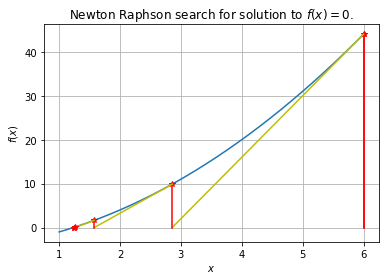

In [39]:
# See ``newton_raphson.py`` for the content of these functions. 
from newton_raphson import newton_raphson_plot
from newton_raphson import myfunc
function_name = 'myfunc'
newton_raphson_plot(function_name,6)
# See the semicolon on the next line? I'm using it to hid the errors. 
plt.savefig('Newton_Raphson_Solution.svg');  # There is now a file in Scaled Vector Format saved

If you really want to understand the Jupyter *magics* execute the next line. 

In [40]:
%magic

(1.2360679774997896, -7.81975583743945e-11)

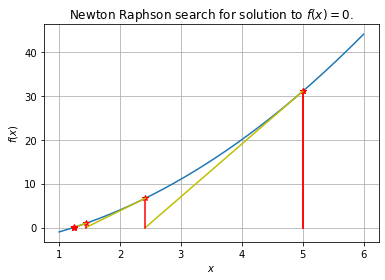

In [41]:
# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!
newton_raphson_plot(function_name, x0=5)

(1.2360679775000651, -9.171621755329502e-07)

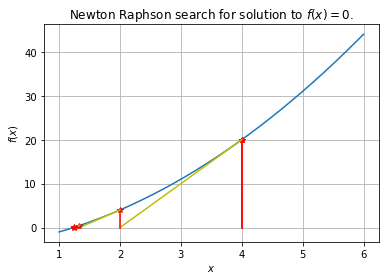

In [42]:
newton_raphson_plot(function_name, x0=4)
## For higher quality inline plots, uncomment below. 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

So, how is this done? Let's start by defining a *function*, or *subroutine*, etc.

In [43]:
def myfunc(x):
#    print('I love Python')
    return x**2+2*x-4

In [44]:
myfunc(3)

11

In [45]:
a = myfunc(4)
print(a)

20


The word *def* takes the place of *function* in Matlab. The colon, ":", ends the line. All other lines are indented a single level. [Standard](https://www.python.org/dev/peps/pep-0008/) formating defined this as 4 spaces. 

* Most editors will move to four spaces is you use the *Tab* key. 
* [Standards](https://www.python.org/dev/peps/pep-0008/) for formatting are considered a big deal: 
    * You won't remember them (all).
    * A good editor (Spyder, PyCharm, Atom) will remember them.
        * Spyder comes as part of Scientific Python distributions
    * They substantially enhance readability.
    * Many editors will make this happen for you automatically on save. 
    * `autopep8` is an awesome tool to just *prettify* your code. p

In [46]:
function_name = 'myfunc'

Plots are done similarly to Matlab. 
* We optioned here, for our sanity, to control the *name space*
* The name *ylabel* **can still be used as a variable**!

In [47]:
ylabel = 4
ylabel

4

In [48]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

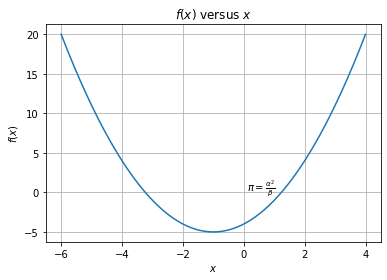

In [49]:
x = np.linspace(start = -6, stop= 4, num = 200)
#x = np.linspace(start=-6, stop=10,num=200)
plt.plot(x, myfunc(x))
plt.grid(True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('$f(x)$ versus $x$')
plt.text(0.1,0.1,'$\\pi = \\frac{\\alpha^2}{\\beta}$')
#plt.show()
# To save a plot
plt.savefig('myplot.pdf')

Let's make it more of a qualitative chart. 

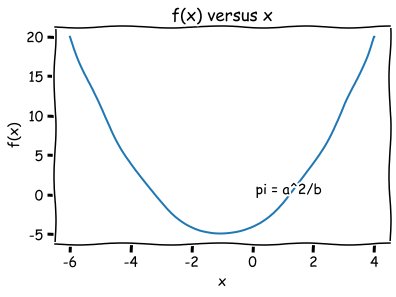

In [50]:
plt.rcParams['text.usetex'] = False
with plt.xkcd():
    plt.plot(x,myfunc(x))
    plt.grid(True)
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.title('f(x) versus x')
    plt.text(0.1, 0.1, 'pi = a^2/b')
    plt.show()

In [51]:
def newton_raphson(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1 # I can add 1 to the variable *count*. Neat Python shortcut. 
        # This is a comment
        # The next line is "Matlab style" and *bad*
        #f = eval(function + '('+ str(x) + ')')
        f = globals()[function](x)  #We explain later. 
        #f2 = eval(function + '('+ str(x+dx) + ')')
        f2 = globals()[function](x+dx)
        # Calculate the slope (estimation of derivative. )
        dfdx = (f2-f)/dx
        # Straight line approximation of delta x to intercept y=0. 
        deltax = -f/dfdx
        # New estimate of x. 
        x = x + deltax
    return x, deltax, count                

In [52]:
newton_raphson(function_name, x0=2)

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [53]:
(x_soln, final_delta_x, num_steps) = newton_raphson(function_name, x0=2)

In [54]:
print(x_soln)
print(final_delta_x)
print(num_steps)

1.2360679774997898
-2.7585905568420595e-13
5


Outputs and unpacking of results

In [55]:
a = newton_raphson(function_name, x0=2)
a

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [56]:
a[0]

1.2360679774997898

In [57]:
a1, a2, a3 = a
a1

1.2360679774997898

In [58]:
a = 1
b = 2
a, b = b, a
a

2

In [59]:
%%timeit #just clocking this
newton_raphson(function_name, x0=2)

3.06 µs ± 75.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [60]:
# less efficient- using the eval statement
def newton_raphson_eval(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    while abs(deltax) > eps and count < 50:
        count += 1
        f = eval(function + '('+ str(x) + ')')
        #f = globals()[function](x)
        f2 = eval(function + '('+ str(x+dx) + ')')
        #f2 = globals()[function](x+dx)
        dfdx = (f2-f)/dx
        deltax = -f/dfdx
        x = x + deltax
    return x, deltax

In [61]:
%%timeit
newton_raphson_eval(function_name, x0=2)

76.5 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


One of the neat things about Python is that a function itself can be assigned to a variable. When we to that, the variable acts just like the function. In the following the  polynomial function ``myfunc`` defined above is assigned to the variable ``function`` to perform the search. It runs faster yet. 

In [62]:
def newton_raphson_variable(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1  
        f = function(x)  # Note that function is a variable containing the actual function
        # It acts like the function itself. 
        f2 = function(x+dx)
        dfdx = (f2-f)/dx # Calculate the slope (estimation of derivative. )
        deltax = -f/dfdx # Straight line approximation of delta x to intercept y=0. 
        x = x + deltax # New estimate of x.
    return x, deltax, count 

In [63]:
%%timeit
newton_raphson_variable(myfunc, x0=2)

2.6 µs ± 50.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<a id = "other_plotting"></a>
## Other plotting

[Matplotlib](https://matplotlib.org/) is really designed to make great print graphics. In the past decade or so the opinion has developed that web-based viewing (or computer screen viewing) of data needs more appropriate visualization tools than something designed with the expectation of printing to a page. 

1. Jake VanderPlas on [The Python Visualization Landscape](https://www.youtube.com/watch?v=FytuB8nFHPQ)
1. [Altair](https://altair-viz.github.io/)
2. [Plotly](https://plot.ly/)
3. [Bokeh](https://plot.ly/)
4. [Vega](https://vega.github.io/vega/)
5. [Mayavi](https://docs.enthought.com/mayavi/mayavi/)
8. [datashader](https://github.com/pyviz/datashader)

More comprehensive information can be found at [VisPy](http://vispy.org/).

There is so much more. If you need it, it's out there. 

<a id = "optimization"></a>
# Optimization

In [64]:
import scipy.optimize

In [65]:
%%timeit
scipy.optimize.broyden1(globals()[function_name], 2, f_tol=1e-14)

944 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [66]:
%%timeit
scipy.optimize.broyden2(globals()[function_name], 2, f_tol=1e-14)

896 µs ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%%timeit
scipy.optimize.root(globals()[function_name], 2)

49.2 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [68]:
%%timeit
scipy.optimize.fsolve(globals()[function_name], 2)

49.2 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


My code is faster. How? Well, the other codes are optimized for very large problems. Mine is optimized for small problems. 

<a id = "formatoutput"></a>
# Formatted printing
[Formatted printing](https://mkaz.tech/code/python-string-format.html) can be performed using the *.format* operator. 

In [69]:
print(np.pi)
print('{:.2f}'.format(np.pi))
print('{:.4f}'.format(np.pi))
print('{:^12.2f}'.format(np.pi))
print('What if {} just {} to {} some stuff {}?'.format('you', 'want', 'insert', 'simply'))

3.141592653589793
3.14
3.1416
    3.14    
What if you just want to insert some stuff simply?


<a id = "aplotting"></a>

# A little more advanced plotting

In [70]:
def sdof_resp(x0=1, v0=0.1, m=1, c=0.25, k=10, tmax=10):
    t = np.linspace(0, tmax, 200)
    omega = np.sqrt(k / m)
    zeta = c / 2 / np.sqrt(m * k)
    if zeta < 1:
        omega_d = omega * np.sqrt(1 - zeta**2)
        X0 = np.sqrt(x0**2 * omega**2 + v0**2 + 2 * x0 * v0 * zeta *
                     omega) / omega_d
        Phi0 = np.arctan2(x0 * omega_d, (v0 + zeta * omega * x0))
        x = X0 * np.exp(-zeta * omega * t) * np.sin(omega_d * t + Phi0)
        
        expdecay = X0 * np.exp(-zeta * omega * t)
        plt.plot(t, expdecay,'--', label = 'Decay Envelope')
        plt.plot(t, -expdecay, '--')
        plt.text(tmax/3, X0 * np.exp(-zeta * omega * tmax/3) + X0*0.03, 'Decay Envelope, $X_0e^{-\zeta\omega_nt}$')

    else:
    
        C1 = (x0 * omega * (zeta + np.sqrt(zeta**2 - 1)) + v0
              ) / 2 / omega / np.sqrt(zeta**2 - 1)
        C2 = (-x0 * omega * (zeta - np.sqrt(zeta**2 - 1)) - v0
              ) / 2 / omega / np.sqrt(zeta**2 - 1)
        x = C1 * np.exp(
            (-zeta + np.sqrt(zeta**2 - 1)) * omega * t) + C2 * np.exp(
                (-zeta - np.sqrt(zeta**2 - 1)) * omega * t)
        x_label = C1 * np.exp(
            (-zeta + np.sqrt(zeta**2 - 1)) * omega * tmax/3) + C2 * np.exp(
                (-zeta - np.sqrt(zeta**2 - 1)) * omega * tmax/3)
        plt.axis([0, tmax, -np.abs(C1+C2)*1.1, np.abs(C1+C2)*1.1])
        plt.text(tmax/3, x_label + x[0]*0.03, 'Overdamped response')
        

    plt.plot(t, np.real(x), label = 'Response')
    plt.xlabel('$t$ (sec)')
    plt.ylabel('$x(t)$ (m)')
    plt.grid(True)
    plt.title('x versus time. $\\zeta = ${:.2f}'.format(zeta))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

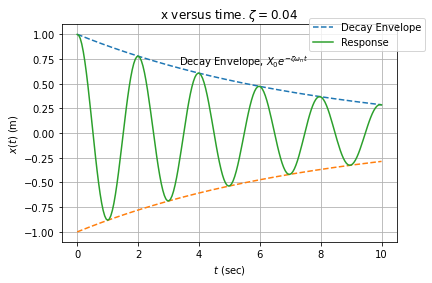

In [71]:
sdof_resp(1,0.1,1,0.25,10,10)

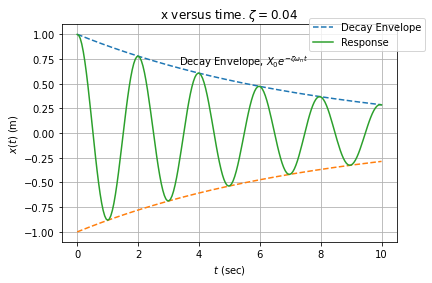

In [72]:
sdof_resp()  # arguments aren't necessary to use the defaults.

In [73]:
from ipywidgets import interact
interact(sdof_resp, x0 = (0,2,0.1), v0 = (0,2,.1), m = (0,2,0.1), k = (0,100,1), c = (-1,5,.1));

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0), FloatSlider(value=0.1, description='v…

Matplotlib also handles subplots and all of the niceties Matlab has. Further, multiple high-end 3-D rendering packages exist to replace codes such as Tecplot.

<a id = "excel"></a>

# Manipulating Excel Spreadsheets

In [74]:
import pandas as pd

In [75]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, mangle_dupe_cols=True)
    Read an Excel file into a pandas DataFrame.
    
    Supports `xls`, `xlsx`, `xlsm`, `xlsb`, `odf`, `ods` and `odt` file extensions
    read from a local filesystem or URL. Supports an option to read
    a single sheet or a list of sheets.
    
    Parameters
    ----------
    io : str, bytes, ExcelFile, xlrd.Book, path object, or file-like object
        Any valid string path is acceptable. The string could be a URL. Valid
        URL schemes include http, ftp, s3, and file. For file URLs, a host is
        expected. A local file c

In [76]:
df = pd.read_excel('Financial_Sample.xlsx')

In [77]:
df

Segment                   Country    Product Discount Band  \
0          Government                    Canada  Carretera          None   
1          Government                   Germany  Carretera          None   
2           Midmarket                    France  Carretera          None   
3           Midmarket                   Germany  Carretera          None   
4           Midmarket                    Mexico  Carretera          None   
..                ...                       ...        ...           ...   
695    Small Business                    France   Amarilla          High   
696    Small Business                    Mexico   Amarilla          High   
697        Government                    Mexico    Montana          High   
698        Government                    Canada      Paseo          High   
699  Channel Partners  United States of America        VTT          High   

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0        1618.5                    3          20      32370.0       0.00   
1        1321.0                    3          20      26420.0       0.00   
2        2178.0                    3          15      32670.0       0.00   
3         888.0                    3          15      13320.0       0.00   
4        2470.0                    3          15      37050.0       0.00   
..          ...                  ...         ...          ...        ...   
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         Sales      COGS    Profit       Date  Month Number Month Name  Year  
0     32370.00   16185.0  16185.00 2014-01-01             1    January  2014  
1     26420.00   13210.0  13210.00 2014-01-01             1    January  2014  
2     32670.00   21780.0  10890.00 2014-06-01             6       June  2014  
3     13320.00    8880.0   4440.00 2014-06-01             6       June  2014  
4     37050.00   24700.0  12350.00 2014-06-01             6       June  2014  
..         ...       ...       ...        ...           ...        ...   ...  
695  631125.00  618750.0  12375.00 2014-03-01             3      March  2014  
696  139230.00  136500.0   2730.00 2014-10-01            10    October  2014  
697    8139.60    6840.0   1299.60 2014-02-01             2   February  2014  
698    4301.85    3615.0    686.85 2014-04-01             4      April  2014  
699   18421.20    5418.0  13003.20 2014-05-01             5        May  2014  

[700 rows x 16 columns]

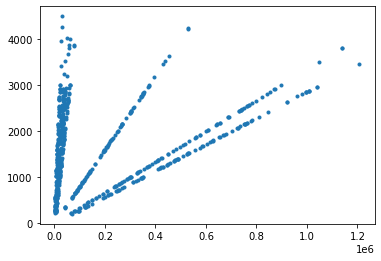

In [78]:
plt.plot(df['Gross Sales'],df['Units Sold'],'.')

In [79]:
df[['Gross Sales','Units Sold']].iloc[[0,2],[0,1]]

Gross Sales  Units Sold
0      32370.0      1618.5
2      32670.0      2178.0

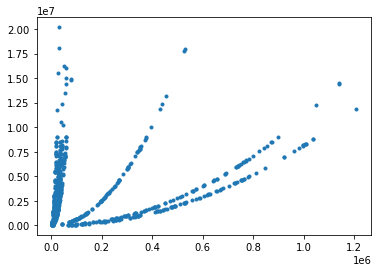

In [80]:
plt.plot(df['Gross Sales'],df['Units Sold']**2,'.')

<a id = "cross-language"></a>
# Using other Languages

Python can call other languages. That's how it does anything. Python itself is written in C, while the numerical algorithms used for Scientific Python are a mixture of [Fortran](https://docs.scipy.org/doc/numpy/f2py/), [C](https://docs.python.org/3.7/extending/extending.html), and JavaScript (`%%javascript`), and [Cython](https://cython.readthedocs.io/en/latest/) which is Python with a little help to make it compilable to run like C (i.e. *fast*). 

For this short course, I am using [Jupyter](http://www.jupyter.org) which allows me to intersperse notes with code. By using [Jupyter magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html), I can use these languages ([and many others](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)) within the notebook. The following are a few examples. 

Using the `fortranmagic` package we can create functions using Fortran. It is compiled Fortran. All of the compiling happens behind the scenes. 

The following examples are gleaned from the f2py project and [Matthias Bussonier's Cross-Language Integration page](https://matthiasbussonnier.com/posts/23-Cross-Language-Integration.html).

In [81]:
# This loads the extension so that it knows what Fortran is. 
%load_ext fortranmagic

The following cell is declared to be all Fortran by the first line `%%fortran`. The code is written as a subroutine. This defines the function `f1` which is now an available function for our python code. 

In [82]:
%%fortran

subroutine f1(x, y, z)
    real, intent(in) :: x,y
    real, intent(out) :: z

    z = sin(x+y)

end subroutine f1

In [83]:
f1(.05, .05)

0.0998334214091301

I need a quick single-argument function- why not the classic Fibonacci sequence? (from Bussonier's page)

In [84]:
def fib(n):
    """
    A simple definition of fibonacci manually unrolled
    """
    if n<2:
        return 1
    x,y = 1,1
    for i in range(n-2):
        x,y = y,x+y
    return y

In [85]:
import numpy as np
X = np.arange(1,30)
Y = np.array([fib(x) for x in X])

Let's plot the sequence. 

In [86]:
import cffi_magic
# rm -rf *.o *.c *.so Cargo.* src target

In [87]:
%%cffi int cfib(int);

int cfib(int n)
{
    int res=0;
    if (n <= 2){  
        res = 1;
    } else {
        res = cfib(n-1)+cfib(n-2);
    }
    return res;
}

In [88]:
cfib(9)

34

<a id = "compiling"></a>
# Compiling Python Code

This simple notebook is an update of the notebook by Jake Vanderplas at https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/ to run on Python 3.5. It compares usage of cython and numba illustrating the ability to vastly increase speed of computation with some simple tricks. 

A very pithy description of this is that `X` contains $1000$ points in 3D space. The Euclidian distance between any two points can be calculated (vector length). This can be represented by a 1000 $\times$ 1000 array containing all possible pairs. Calculating this in Python is slow. This can be easily sped up by "precompiling" the code. 

For more details on how to migrate to compiled code see [Hans Lantangen's tutorial](http://hplgit.github.io/primer.html/doc/pub/cython/cython-solarized.html).

In [89]:
X = np.random.random((1000, 3))
D = np.empty((1000, 1000))

In [90]:
# Pure python version

def pairwise_python(X, D):
    M = X.shape[0]
    N = X.shape[1]
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = np.sqrt(d)
    return D

In [94]:
# numba version

import numpy as np
from numba import double

from numba import jit

# The next line is the only "change to the code"
@jit     # (arg_types=[double[:,:], double[:,:]])
def pairwise_numba(X, D):
    M = X.shape[0]
    N = X.shape[1]
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = np.sqrt(d)
    return D

- We are going to load the Cython extension for Jupyter. 

- This allows us to put a few things into Python code. 

- Cython then turns it into C code, compiles it, and runs it in the background. 

The following won't work unless you have installed a C compiler:

1. [Windows](https://github.com/cython/cython/wiki/InstallingOnWindows)
  1. A quick way may be to [install MinGW](https://osdn.net/projects/mingw/downloads/68260/mingw-get-setup.exe/)
2. Mac: Install the Apple Developer Tools

In [95]:
%load_ext Cython

In [96]:
%%cython
# The above declares that this cell is Cython code.

# Load some cheats that help cython
cimport cython

# Load the sqrt function, but with cimport, also import knowledge of the variable 
# type used (it's a floating point)
from libc.math cimport sqrt

# Tell cython not to check if my indices called ae actually inside the array
# This is a good move if you are ABSOLUTELY sure of it. It's a bad move otherwise. 
@cython.boundscheck(False)

# This disallows use of negative indices. 
@cython.wraparound(False)
def pairwise_cython(double[:, ::1] X, double[:, ::1] D):
    cdef int M = X.shape[0]
    cdef int N = X.shape[1]
    cdef double tmp, d
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = sqrt(d)
    return D

In [97]:
%timeit pairwise_python(X, D)

2.93 s ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
%timeit pairwise_numba(X, D)

2.84 ms ± 89.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%timeit pairwise_cython(X, D)

2.47 ms ± 47.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


However, the right way to code this up in Python is the following. 

In [100]:
def pairwise_numpy(X):
    return np.sqrt(((X[:, None, :] - X) ** 2).sum(-1))
%timeit pairwise_numpy(X)

28.4 ms ± 635 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


This is slower than compiled, but almost 10 times faster than looped Python. Just like Matlab- a few tricks can go a long ways. 

Frankly, `numba` is so easy it's the obvious choice.

<a id = "parallel"></a>
# Parallel Processing

Modern computers almost always have multiple cores. Each core is *like* a separate CPU- it kind of acts like a separate computer. This allows them to do many things at the same time better than if processes have to share a single core. 

Most people will never need this- unless you desperately do. 

To speed up operations, programs can be written to use more than one core. [High Powered Computing](https://en.wikipedia.org/wiki/High-performance_technical_computing) can use multiple machines simultaneously. An explanation of this can be found in [An introduction to parallel programming using Python's multiprocessing module](https://sebastianraschka.com/Articles/2014_multiprocessing.html)

Here I show simple usage of the built-in Python module [multiprocessing](https://docs.python.org/2/library/multiprocessing.html). A tutorial can be found [here](https://www.blog.pythonlibrary.org/2016/08/02/python-201-a-multiprocessing-tutorial/). Note that the line:

```if __name__ == '__main__':```

is how Python checks if it has been run from a terminal and the script containing the line is the one Python is being told to run. It's a bit formal- and these scripts would run without the line- but there is a good reason to use this for scripts (so you could run them in other ways). 



In [101]:
import multiprocessing as mp
import random
import string

In [102]:
def parzen_estimation(x_samples, point_x, h):
    k_n = 0
    for row in x_samples:
        x_i = (point_x - row[:,np.newaxis]) / (h)
        for row in x_i:
            if np.abs(row) > (1/2):
                break
        else: # "completion-else"*
            k_n += 1
    return (h, (k_n / len(x_samples)) / (h**point_x.shape[1]))

In [103]:
def serial(samples, x, widths):
    return [parzen_estimation(samples, x, w) for w in widths]

In [104]:
def multiprocess(processes, samples, x, widths):
    pool = mp.Pool(processes=processes)
    results = [pool.apply_async(parzen_estimation, args=(samples, x, w)) for w in widths]
    results = [p.get() for p in results]
    results.sort() # to sort the results by input window width
    return results

In [117]:
import timeit
widths = np.linspace(1.0, 1.2, 100)
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
widths = np.arange(0.1, 1.3, 0.1)
point_x = np.array([[0],[0]])
results = []

n = 100 # Add a zero to really test the value. 
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, n)

Standard serial process

In [118]:
%%timeit
serial(x_2Dgauss, point_x, widths)

4.78 ms ± 63.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using 2 cores

In [120]:
# %%timeit
multiprocess(2, x_2Dgauss, point_x, widths)

KeyboardInterrupt: 

Using 4 cores

In [114]:
multiprocess(4, x_2Dgauss, point_x, widths)

KeyboardInterrupt: 

In [ ]:
%%timeit
multiprocess(4, x_2Dgauss, point_x, widths)


Using 8 cores

In [113]:
%%timeit

multiprocess(8, x_2Dgauss, point_x, widths)


KeyboardInterrupt: 

I forgot, I only have 4 cores. 

In [109]:
widths = np.linspace(1.0, 1.2, 100)
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
widths = np.arange(0.1, 1.3, 0.1)
point_x = np.array([[0],[0]])
results = []

n = 10000 # Add a zero to really test the value. 
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, n)
# x_2Dgauss = da.from_array(x_2Dgauss, chunks = 10)

In [130]:
@jit(forceobj=True)
def jit_parzen_estimation(x_samples, point_x, h):
    k_n = 0
    for row in x_samples:
        x_i = (point_x - row[:,np.newaxis]) / (h)
        for row in x_i:
            if np.abs(row) > (1/2):
                break
        else: # "completion-else"*
            k_n += 1
    return (h, (k_n / 10000) / (h**3))

In [131]:
@jit(forceobj=True)
def jit_serial(samples, x, widths):
    return [jit_parzen_estimation(samples, x, w) for w in widths]

In [132]:
%%timeit
jit_serial(x_2Dgauss, point_x, widths)

5.63 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [133]:
@jit(parallel=True, forceobj=True)
def jit_parzen_estimation(x_samples, point_x, h):
    k_n = 0
    for row in x_samples:
        x_i = (point_x - row[:,np.newaxis]) / (h)
        for row in x_i:
            if np.abs(row) > (1/2):
                break
        else: # "completion-else"*
            k_n += 1
    return (h, (k_n / 10000) / (h**3))

@jit(parallel=True)
def jit_parallel(samples, x, widths):
    return [jit_parzen_estimation(samples, x, w) for w in widths]

In [134]:
%%timeit
jit_parallel

17.2 ns ± 0.31 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


<a id = "other_parallel"></a>
## Other parallel processing

1. A relatively comprehensive list of parallel, cluster, and cloud computing tools [is available](https://wiki.python.org/moin/ParallelProcessing).

2. Not listed and useful: [Dask](https://dask.org/)

3. [IPyParallel](https://ipyparallel.readthedocs.io/)

3. More notes are available at [Parallel Python: Analyzing Large Datasets](https://github.com/pydata/parallel-tutorial)

4. You can [parallelize while compiling with Numba]()https://numba.pydata.org/numba-doc/dev/user/parallel.html

<a id = "mycode"></a>

# Your own package


Files containing functions are *modules*. Can can have as many functions as you want in a module (or objects... but I'm not covering object-oriented Python today).

To load a module you can type:
- `import module_name` # do not include the `.py`
- `from "module_name" import "function_name"`
- `from "module_name" import *` # sloppy practice, but sometimes obviously ok

as long as either:
1. The module is in your path.
2. The module is in your current working directory. 

Here are two simple modules. I could import them now.

In [ ]:
from mymath import add

In [ ]:
add(3, 4)

This is ok, but requires you to move around directories. 

OK for a single project, but what if you have multiple projects that you want to pull together?


In [ ]:
%pwd

In [ ]:
%cd ..


What we typically want to do is be able to run the code, regardless of the current directory. 

If we edit it, it takes on the new definition. 

Spyder allows you to do this with a single module at a time. 

I've created a package template for you. 

We do this by installing it as a *package*.

This will allow you to put all your modules in  `mycode\mycode` and they will be accessible on your next `ipython` session (ipython is the enhanced environment- it is much better for interactive work). 

## Creating your first module
1. move the top-level `mycode` folder to your Documents folder.
2. Run the Anaconda Prompt
3. type: `cd Documents\mycode` and hit enter (us '/' instead of '\' on mac or linux)
4. type `dir` (`ls` on Mac or Unix). You should see many things, one is a file names `setup.py` (this means you are ok so far). 
5. type `pip install -e .`. This command means install this package (`.`) in editable form `-e`. 

Inside the lower level `mycode` folder is a file `__init__.py` with instructions. 
```
# Uncomment the next line to import all functions in the mymath.py
# file when importing mycode.

# from .mymath import *

# All functions in mystrings.py will be imported with mycode
from .mystrings import *
```

In [ ]:
# mymath must be explicitely imported to use it. 
import mycode.mymath
mycode.mymath.add(2,3)

In [ ]:
# The functions in mystrings are automatically imported
mycode.concatenate('Hi ', 'there!')

For a *very* sophisticated template, see [Alex Ioannides' resource](https://github.com/AlexIoannides/py-package-template>`_.

<a id = "other"></a>
## Other resources

1. [Numpy for Matlab users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
2. [SciPy - Introduction](https://www.tutorialspoint.com/scipy/scipy_introduction.htm)
3. [SciPy Lecture Notes](https://scipy-lectures.org/index.html)
4. [SciPy tutorial](https://www.guru99.com/scipy-tutorial.html)
5. [SciPy Cookbook](https://scipy-cookbook.readthedocs.io/)
5. [matplotlib tutorial](https://matplotlib.org/tutorials/)
6. [Python Plotting With Matplotlib](https://realpython.com/python-matplotlib-guide/#pylab-what-is-it-and-should-i-use-it)
7. [Pandas Cookbook](https://github.com/jvns/pandas-cookbook)
8. [Lorena Barba's Numerical Python MOOC](https://github.com/numerical-mooc/numerical-mooc)
9. [SciPy Cookbook](https://scipy-cookbook.readthedocs.io/)
10. [Full set of notes for a Scientific Python Course](https://github.com/scipy-lectures/scipy-lecture-notes)
